In [1]:
import cartopy.feature as cfeature
import numpy as np                         # Good module for matrix and matrix operation
import matplotlib as mpl
import matplotlib.pyplot as plt            # Module to produce figure
import matplotlib.colors as colors
import os                                  # Used to convert png to other format
from datetime import datetime
from matplotlib import gridspec,rc
from scipy.stats import spearmanr, pearsonr
import pandas as pd

In [2]:
df = pd.read_fwf('Stormlist_inNNA_2001_2020_exceedance_WDp99p0_TPp99p0_timecum.txt',  widths=[6, 9, 13, 8, 8, 9, 9], 
                names=['Stormno', 'pmin', 'vors','Wexceed','Pexceed','Wexarea','Pexarea'])

In [3]:
df

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea
0,1,968.40,0.000111,0.00,0.00,0.0,0.0
1,2,957.87,0.000173,0.00,0.00,0.0,0.0
2,3,995.92,0.000061,0.00,0.00,0.0,0.0
3,4,974.74,0.000065,0.00,0.00,0.0,0.0
4,5,981.92,0.000102,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...
12354,12355,982.60,0.000119,0.00,0.00,0.0,0.0
12355,12356,968.17,0.000122,2.54,1.01,3501.0,3051.0
12356,12357,977.07,0.000091,0.02,0.00,339.0,129.0
12357,12358,954.78,0.000219,0.00,0.00,0.0,0.0


In [4]:
# The above dataframe contains all ETCs in NNA, but we only want to consider the ones that caused 
# at least one hourly local extreme in the region. So remove the rest...
df = df[~((df['Wexarea'] == 0.0) & (df['Pexarea'] == 0.0))]

In [5]:
df

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea
617,618,1007.13,0.000052,0.00,0.00,0.0,2.0
620,621,976.90,0.000119,0.01,0.00,74.0,0.0
626,627,985.58,0.000084,1.75,0.01,3111.0,423.0
629,630,991.15,0.000089,0.43,0.00,794.0,24.0
630,631,977.31,0.000125,0.06,0.04,233.0,399.0
...,...,...,...,...,...,...,...
12350,12351,1002.46,0.000047,0.00,0.00,11.0,0.0
12352,12353,1001.77,0.000040,0.00,0.00,0.0,1.0
12353,12354,996.97,0.000065,0.00,0.01,115.0,196.0
12355,12356,968.17,0.000122,2.54,1.01,3501.0,3051.0


In [6]:
df['Wexrank']=df['Wexceed'].rank(ascending=False)
df['Pexrank']=df['Pexceed'].rank(ascending=False)
df['Warerank']=df['Wexarea'].rank(ascending=False)
df['Parerank']=df['Pexarea'].rank(ascending=False)
df['WPexceed']=df['Wexceed']*df['Pexceed']
df['WPexrank']=df['WPexceed'].rank(ascending=False)

/tmp/ipykernel_3810389/1355503860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wexrank']=df['Wexceed'].rank(ascending=False)
/tmp/ipykernel_3810389/1355503860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pexrank']=df['Pexceed'].rank(ascending=False)
/tmp/ipykernel_3810389/1355503860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [7]:
### 2019 Halloween Storm number: 11649
Halloween = df[df['Stormno'] == 11649]

In [8]:
Halloween

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea,Wexrank,Pexrank,Warerank,Parerank,WPexceed,WPexrank
11648,11649,976.47,0.000128,2.69,1.79,4059.0,3481.0,131.0,117.0,119.0,401.5,4.8151,39.0


In [85]:
Wex95= df['Wexceed'].quantile(.95, interpolation='linear')
Pex95= df['Pexceed'].quantile(.95, interpolation='linear')
WPex95= df['WPexceed'].quantile(.95, interpolation='linear')

Wex98= df['Wexceed'].quantile(.98, interpolation='linear')
Pex98= df['Pexceed'].quantile(.98, interpolation='linear')
WPex98= df['WPexceed'].quantile(.98, interpolation='linear')

Wex99= df['Wexceed'].quantile(.99, interpolation='linear')
Pex99= df['Pexceed'].quantile(.99, interpolation='linear')
WPex99= df['WPexceed'].quantile(.99, interpolation='linear')


Wex999= df['Wexceed'].quantile(.999, interpolation='linear')
Pex999= df['Pexceed'].quantile(.999, interpolation='linear')
WPex999= df['WPexceed'].quantile(.999, interpolation='linear')

print(WPex95)
print(WPex98)
print(WPex99)

0.721
2.2494199999999958
3.5610000000000106


In [86]:
curve_x = np.arange(0.01, 25, 0.5)
nx = curve_x.shape[0]

curve_y98= np.zeros_like(curve_x)
curve_y99= np.zeros_like(curve_x)
curve_y999= np.zeros_like(curve_x)

for n in range(nx):
    curve_y98[n]= WPex98/curve_x[n]
    curve_y99[n]= WPex99/curve_x[n]
    curve_y999[n]= WPex999/curve_x[n]
    

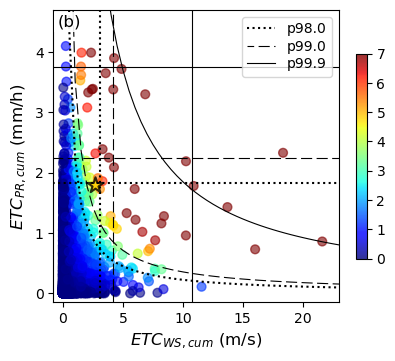

In [87]:
fig = plt.figure(figsize=(4.6,3.8))
ax = fig.add_subplot(1, 1, 1)

cf=plt.scatter(df['Wexceed'], df['Pexceed'] , c= df['WPexceed'] ,
            cmap = 'jet', vmin= 0, vmax = 7 ,s = 40, alpha =0.6)

plt.scatter(Halloween['Wexceed'], Halloween['Pexceed'] , c= Halloween['WPexceed'], marker='*',
            edgecolor='k', lw=1.5, vmin= 0, vmax = 7,
            cmap = 'jet', s = 140, alpha =0.8)

plt.plot(curve_x, curve_y98, linestyle='dotted', color='k', lw=1.5, label='p98.0')

#plt.axvline(x=Wex95, ymin=-0.1, ymax=1, linestyle='dashed', color='k', lw=0.5)
#plt.axhline(y=Pex95, xmin=-0.1, xmax=1, linestyle='dashed', color='k', lw=0.5)

plt.axvline(x=Wex98, ymin=-0.1, ymax=1, linestyle='dotted', color='k', lw=1.5)
plt.axhline(y=Pex98, xmin=-0.1, xmax=1, linestyle='dotted', color='k', lw=1.5)

plt.plot(curve_x, curve_y99, linestyle=(4, (10, 4)), color='k', lw=0.8 , label='p99.0')
plt.axvline(x=Wex99, ymin=-0.1, ymax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)
plt.axhline(y=Pex99, xmin=-0.1, xmax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)

plt.plot(curve_x, curve_y999, linestyle='solid', color='k', lw=0.8, label='p99.9')
plt.axvline(x=Wex999, ymin=-0.1, ymax=1, linestyle='solid', color='k', lw=0.8)
plt.axhline(y=Pex999, xmin=-0.1, xmax=1, linestyle='solid', color='k', lw=0.8)



plt.ylim(-0.15,4.7)
plt.xlim(-0.8,23)
#plt.xscale("log")
#plt.yscale("log")

#plt.text(df_WPtop1['Wexceed'].values,df_WPtop1['Pexceed'].values,df_WPtop1['Stormno'].values[0], fontsize=8, ha='center',weight='bold')
#plt.text(df_Ptop1['Wexceed'].values,df_Ptop1['Pexceed'].values,df_Ptop1['Stormno'].values[0], fontsize=8, ha='center',weight='bold')
#plt.text(0.8,0.08,'99th perc.')
#plt.text(0.8,0.0,'98th perc.')

plt.legend(loc="upper right",labelspacing = 0.25) 

#h1,_ = cntr1.legend_elements()
#h2,_ = cntr2.legend_elements()
#h3,_ = cntr3.legend_elements()
#ax.legend([h1[0], h2[0], h3[0]], ['98th', '99th', '99.9th'])
#cbaxes = fig.add_axes([0.8, 0.1, 0.016, 0.32])  
#cb = plt.colorbar(cf, cax = cbaxes, orientation='vertical')
cbar = plt.colorbar(shrink=0.7)
#cbar.ax.set_title(r'(${\mathrm{EE}_{PR,cum}})\cdot({\mathrm{EE}_{WS,cum}})$', fontsize=12, x=4, y=0.13, rotation=90)

plt.text(-0.48,4.62,'(b)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top',fontsize=12,zorder=28)
plt.ylabel(''r'${ETC}_{PR,cum}$ (mm/h)',fontsize=12)
plt.xlabel(''r'${ETC}_{WS,cum}$ (m/s)',fontsize=12)
plt.savefig('Fig10b_tempcum_exceedance_storm', bbox_inches='tight', dpi=200)


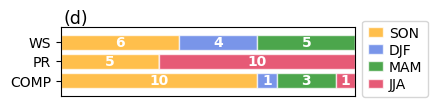

In [196]:

season_names=['SON','DJF','MAM','JJA']

results={
    'WS': [ 6, 4, 5, 0],
    'PR': [ 5, 0, 0, 10],
    'COMP': [ 10, 1, 3, 1]
}


def season_count(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    #category_colors = plt.get_cmap('RdYlGn')(
    #    np.linspace(0.15, 0.85, data.shape[1]))
    category_colors = [ 'orange', 'royalblue','green','crimson']

    fig, ax = plt.subplots(figsize=(3.8, 0.9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_ylim(2.8,-0.8)
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.8,
                label=colname, color=color, alpha=0.7, ec='white')
        xcenters = starts + widths / 2

        #r, g, b, _ = color
        text_color = 'white' #if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c > 0:
                ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color, fontsize=10, weight='bold')
    ax.legend(ncol=1, bbox_to_anchor=(1, -0.11),
              loc='lower left', fontsize='medium',
              labelspacing = 0.22,
              handlelength=1.1, 
              handletextpad=0.4)

    return fig, ax



season_count(results, season_names)
plt.text(0.15,-1.7,'(d)',bbox={'facecolor':'None','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top',fontsize=12.5,zorder=28)
plt.savefig('Fig10d_tempcum_storm_seacount', bbox_inches='tight', dpi=200)

plt.show()

### Supporting information

In [188]:
df_Wtop15 = df[df['Wexrank']<16]
df_Wtop15['NAECid']=df_Wtop15['Stormno']+12245

In [191]:
df_Wtop15

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea,Wexrank,Pexrank,Warerank,Parerank,WPexceed,WPexrank,NAECid
1348,1349,962.30,0.000110,16.03,0.73,8405.0,5544.0,3.0,564.0,2.0,73.0,11.7019,11.0,13594
3472,3473,969.86,0.000149,7.69,0.88,8423.0,5657.0,14.0,438.5,1.0,67.0,6.7672,25.0,15718
4789,4790,970.17,0.000116,11.56,0.11,7074.0,2093.0,5.0,1992.0,10.0,924.0,1.2716,189.0,17035
5588,5589,977.84,0.000117,8.21,1.16,7407.0,6548.0,12.0,267.0,8.0,24.0,9.5236,15.0,17834
6418,6419,955.09,0.000153,13.72,1.43,6972.0,5709.0,4.0,193.0,12.0,60.0,19.6196,4.0,18664
8203,8204,966.02,0.000146,10.90,1.78,7024.0,5248.0,6.0,118.5,11.0,90.0,19.4020,5.0,20449
8995,8996,967.70,0.000096,7.88,0.01,3561.0,405.0,13.0,3319.0,164.0,2612.0,0.0788,756.0,21241
9357,9358,957.23,0.000128,8.42,1.28,5716.0,6016.0,9.0,224.5,36.0,45.0,10.7776,12.0,21603
9443,9444,958.97,0.000104,10.25,0.96,6140.0,4672.0,8.0,388.5,23.0,150.5,9.8400,14.0,21689
10117,10118,963.38,0.000132,21.63,0.86,7955.0,5013.0,1.0,461.0,4.0,106.0,18.6018,6.0,22363


In [192]:
df_Ptop15 = df[df['Pexrank']<16]
df_Ptop15['NAECid']=df_Ptop15['Stormno']+12245

/tmp/ipykernel_2560387/4013158660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ptop15['NAECid']=df_Ptop15['Stormno']+12245


In [193]:
df_Ptop15

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea,Wexrank,Pexrank,Warerank,Parerank,WPexceed,WPexrank,NAECid
1663,1664,958.40,0.000152,3.56,3.65,6233.0,6725.0,69.5,8.0,21.0,15.0,12.9940,10.0,13909
2156,2157,970.31,0.000143,4.88,3.72,3503.0,6420.0,39.0,7.0,171.0,29.0,18.1536,7.0,14402
2766,2767,977.63,0.000124,4.19,3.38,6017.0,6698.0,53.0,14.5,26.0,17.0,14.1622,9.0,15012
3290,3291,981.63,0.000090,0.28,3.51,2169.0,5862.0,906.0,11.0,450.0,51.0,0.9828,216.0,15536
3349,3350,933.20,0.000189,0.23,4.10,1338.0,4389.0,1000.5,1.0,788.0,200.0,0.9430,226.5,15595
4478,4479,983.18,0.000123,2.40,3.38,2914.0,5841.0,154.0,14.5,252.0,53.0,8.1120,20.0,16724
5030,5031,980.68,0.000122,1.50,3.76,3929.0,7253.0,277.5,5.5,134.0,5.0,5.6400,31.0,17276
5127,5128,989.36,0.000092,1.54,3.99,4415.0,5767.0,263.5,2.5,88.0,57.0,6.1446,29.0,17373
5714,5715,995.53,0.000072,0.02,3.41,323.0,7570.0,2177.5,12.0,1902.0,2.0,0.0682,795.0,17960
6338,6339,985.67,0.000096,1.44,3.53,4039.0,7335.0,291.5,10.0,122.0,3.0,5.0832,36.0,18584


In [194]:
df_WPtop15 = df[df['WPexrank']<16]
df_WPtop15['NAECid']=df_WPtop15['Stormno']+12245

/tmp/ipykernel_2560387/3154237776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WPtop15['NAECid']=df_WPtop15['Stormno']+12245


In [195]:
df_WPtop15

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea,Wexrank,Pexrank,Warerank,Parerank,WPexceed,WPexrank,NAECid
1348,1349,962.30,0.000110,16.03,0.73,8405.0,5544.0,3.0,564.0,2.0,73.0,11.7019,11.0,13594
1663,1664,958.40,0.000152,3.56,3.65,6233.0,6725.0,69.5,8.0,21.0,15.0,12.9940,10.0,13909
2156,2157,970.31,0.000143,4.88,3.72,3503.0,6420.0,39.0,7.0,171.0,29.0,18.1536,7.0,14402
2766,2767,977.63,0.000124,4.19,3.38,6017.0,6698.0,53.0,14.5,26.0,17.0,14.1622,9.0,15012
4556,4557,970.55,0.000156,6.86,3.30,5783.0,6708.0,21.0,17.0,33.0,16.0,22.6380,2.0,16802
5588,5589,977.84,0.000117,8.21,1.16,7407.0,6548.0,12.0,267.0,8.0,24.0,9.5236,15.0,17834
5841,5842,950.82,0.000151,5.98,1.73,7534.0,6258.0,27.0,131.5,7.0,36.0,10.3454,13.0,18087
6418,6419,955.09,0.000153,13.72,1.43,6972.0,5709.0,4.0,193.0,12.0,60.0,19.6196,4.0,18664
8203,8204,966.02,0.000146,10.90,1.78,7024.0,5248.0,6.0,118.5,11.0,90.0,19.4020,5.0,20449
9357,9358,957.23,0.000128,8.42,1.28,5716.0,6016.0,9.0,224.5,36.0,45.0,10.7776,12.0,21603


corr(WS,pmin) -0.30100360981719115
corr(PR,pmin) -0.11414307198851002
corr(WP,pmin) -0.17440751059725093


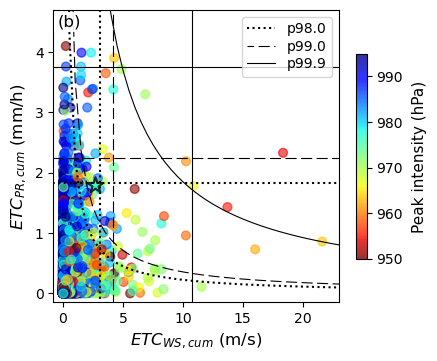

In [88]:

fig = plt.figure(figsize=(4.6,3.8))
ax = fig.add_subplot(1, 1, 1)

cf=plt.scatter(df['Wexceed'], df['Pexceed'] , c= df['pmin'] ,
            cmap = 'jet_r', vmin= 950, vmax = 995 ,s = 40, alpha =0.6)

plt.scatter(Halloween['Wexceed'], Halloween['Pexceed'] , c= Halloween['pmin'], marker='*',
            edgecolor='k', lw=1.5, vmin= 950, vmax = 995,
            cmap = 'jet_r', s = 140, alpha =0.8)

plt.plot(curve_x, curve_y98, linestyle='dotted', color='k', lw=1.5, label='p98.0')

#plt.axvline(x=Wex95, ymin=-0.1, ymax=1, linestyle='dashed', color='k', lw=0.5)
#plt.axhline(y=Pex95, xmin=-0.1, xmax=1, linestyle='dashed', color='k', lw=0.5)

plt.axvline(x=Wex98, ymin=-0.1, ymax=1, linestyle='dotted', color='k', lw=1.5)
plt.axhline(y=Pex98, xmin=-0.1, xmax=1, linestyle='dotted', color='k', lw=1.5)

plt.plot(curve_x, curve_y99, linestyle=(4, (10, 4)), color='k', lw=0.8 , label='p99.0')
plt.axvline(x=Wex99, ymin=-0.1, ymax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)
plt.axhline(y=Pex99, xmin=-0.1, xmax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)

plt.plot(curve_x, curve_y999, linestyle='solid', color='k', lw=0.8, label='p99.9')
plt.axvline(x=Wex999, ymin=-0.1, ymax=1, linestyle='solid', color='k', lw=0.8)
plt.axhline(y=Pex999, xmin=-0.1, xmax=1, linestyle='solid', color='k', lw=0.8)

print('corr(WS,pmin)', df['Wexceed'].corr(df['pmin']))
print('corr(PR,pmin)', df['Pexceed'].corr(df['pmin']))
print('corr(WP,pmin)', df['WPexceed'].corr(df['pmin']))

plt.ylim(-0.15,4.7)
plt.xlim(-0.8,23)
#plt.xscale("log")
#plt.yscale("log")

#plt.text(df_WPtop1['Wexceed'].values,df_WPtop1['Pexceed'].values,df_WPtop1['Stormno'].values[0], fontsize=8, ha='center',weight='bold')
#plt.text(df_Ptop1['Wexceed'].values,df_Ptop1['Pexceed'].values,df_Ptop1['Stormno'].values[0], fontsize=8, ha='center',weight='bold')
#plt.text(0.8,0.08,'99th perc.')
#plt.text(0.8,0.0,'98th perc.')

plt.legend(loc="upper right",labelspacing = 0.25) 

#h1,_ = cntr1.legend_elements()
#h2,_ = cntr2.legend_elements()
#h3,_ = cntr3.legend_elements()
#ax.legend([h1[0], h2[0], h3[0]], ['98th', '99th', '99.9th'])
#cbaxes = fig.add_axes([0.8, 0.1, 0.016, 0.32])  
#cb = plt.colorbar(cf, cax = cbaxes, orientation='vertical')
cbar = plt.colorbar(shrink=0.7)
cbar.ax.set_title('Peak intensity (hPa)', x=6.2, y=0.1, fontsize=11, rotation=90)

plt.text(-0.48,4.62,'(b)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top',fontsize=12,zorder=28)
plt.ylabel(''r'${ETC}_{PR,cum}$ (mm/h)',fontsize=12)
plt.xlabel(''r'${ETC}_{WS,cum}$ (m/s)',fontsize=12)
plt.savefig('FigS9b_tempcum_exceedance_storm_pmin', bbox_inches='tight', dpi=200)


corr(WS,pmin) 0.3010036557127803
corr(PR,pmin) 0.19494297496796803
corr(WP,pmin) 0.1931644074659713


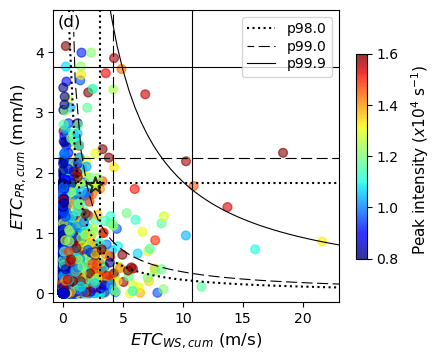

In [89]:

fig = plt.figure(figsize=(4.6,3.8))
ax = fig.add_subplot(1, 1, 1)

cf=plt.scatter(df['Wexceed'], df['Pexceed'] , c= df['vors']*1.e4 ,
            cmap = 'jet', vmin= 0.8, vmax = 1.6 ,s = 40, alpha =0.6)

plt.scatter(Halloween['Wexceed'], Halloween['Pexceed'] , c= Halloween['vors']*1.e4, marker='*',
            edgecolor='k', lw=1.5,vmin= 0.8, vmax = 1.6,
            cmap = 'jet', s = 140, alpha =0.8)

plt.plot(curve_x, curve_y98, linestyle='dotted', color='k', lw=1.5, label='p98.0')

#plt.axvline(x=Wex95, ymin=-0.1, ymax=1, linestyle='dashed', color='k', lw=0.5)
#plt.axhline(y=Pex95, xmin=-0.1, xmax=1, linestyle='dashed', color='k', lw=0.5)

plt.axvline(x=Wex98, ymin=-0.1, ymax=1, linestyle='dotted', color='k', lw=1.5)
plt.axhline(y=Pex98, xmin=-0.1, xmax=1, linestyle='dotted', color='k', lw=1.5)

plt.plot(curve_x, curve_y99, linestyle=(4, (10, 4)), color='k', lw=0.8 , label='p99.0')
plt.axvline(x=Wex99, ymin=-0.1, ymax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)
plt.axhline(y=Pex99, xmin=-0.1, xmax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)

plt.plot(curve_x, curve_y999, linestyle='solid', color='k', lw=0.8, label='p99.9')
plt.axvline(x=Wex999, ymin=-0.1, ymax=1, linestyle='solid', color='k', lw=0.8)
plt.axhline(y=Pex999, xmin=-0.1, xmax=1, linestyle='solid', color='k', lw=0.8)

print('corr(WS,pmin)', df['Wexceed'].corr(df['vors']))
print('corr(PR,pmin)', df['Pexceed'].corr(df['vors']))
print('corr(WP,pmin)', df['WPexceed'].corr(df['vors']))

plt.ylim(-0.15,4.7)
plt.xlim(-0.8,23)
#plt.xscale("log")
#plt.yscale("log")

#plt.text(df_WPtop1['Wexceed'].values,df_WPtop1['Pexceed'].values,df_WPtop1['Stormno'].values[0], fontsize=8, ha='center',weight='bold')
#plt.text(df_Ptop1['Wexceed'].values,df_Ptop1['Pexceed'].values,df_Ptop1['Stormno'].values[0], fontsize=8, ha='center',weight='bold')
#plt.text(0.8,0.08,'99th perc.')
#plt.text(0.8,0.0,'98th perc.')

plt.legend(loc="upper right",labelspacing = 0.25) 

#h1,_ = cntr1.legend_elements()
#h2,_ = cntr2.legend_elements()
#h3,_ = cntr3.legend_elements()
#ax.legend([h1[0], h2[0], h3[0]], ['98th', '99th', '99.9th'])
#cbaxes = fig.add_axes([0.8, 0.1, 0.016, 0.32])  
#cb = plt.colorbar(cf, cax = cbaxes, orientation='vertical')
cbar = plt.colorbar(shrink=0.7)
cbar.ax.set_title('Peak intensity ('r'$x10^4$'' 'r'$\mathrm{s}^{-1}$)', x=6.2, y=0., fontsize=11, rotation=90)


plt.text(-0.48,4.62,'(d)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top',fontsize=12,zorder=28)
plt.ylabel(''r'${ETC}_{PR,cum}$ (mm/h)',fontsize=12)
plt.xlabel(''r'${ETC}_{WS,cum}$ (m/s)',fontsize=12)
plt.savefig('FigS9d_tempcum_exceedance_storm_vors', bbox_inches='tight', dpi=200)
